In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})

def generatedDisparity(imgL, imgR, max_disp=16, wsize=15):
    stereo = cv.StereoBM_create(max_disp, wsize)
    disparity = stereo.compute(imgL, imgR)
    return disparity

def generateMedianFilter(disparity, size=5):
    return cv.medianBlur(disparity, size)

def generateGaussianFilter(disparity, size=(5,5)):
    return cv.GaussianBlur(disparity, size, 0)

def generateWLS(imgL, imgR, max_disp=128, wsize=31, sigma=1.5, lmbda=8000.0):
    left_matcher = cv.StereoBM_create(max_disp, wsize);
    right_matcher = cv.ximgproc.createRightMatcher(left_matcher);
    left_disp = left_matcher.compute(imgL, imgR);
    right_disp = right_matcher.compute(imgR, imgL);

    # Now create DisparityWLSFilter
    wls_filter = cv.ximgproc.createDisparityWLSFilter(left_matcher);
    wls_filter.setLambda(lmbda);
    wls_filter.setSigmaColor(sigma);
    filtered_disp = wls_filter.filter(left_disp, imgL, disparity_map_right=right_disp)
    return filtered_disp

def calculateMSE(**images):
    keys = list(images.keys())
    ground_truth = images[keys[0]]
    for key in keys[1:]:
        Y = np.square(np.subtract(ground_truth,images[key])).mean()
        print(f"MSE of {key}:", Y)

# Image 1

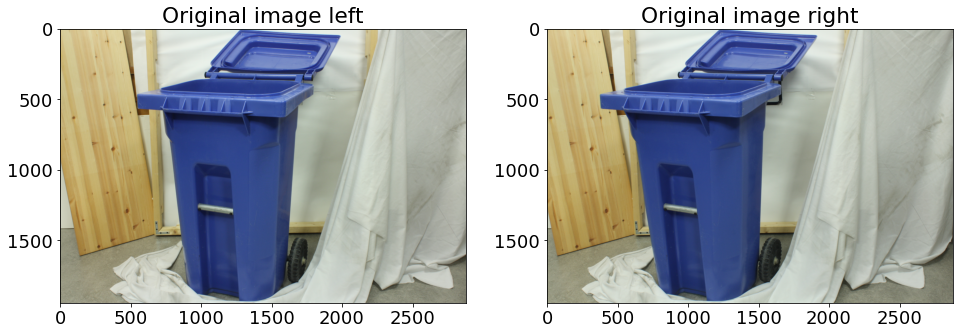

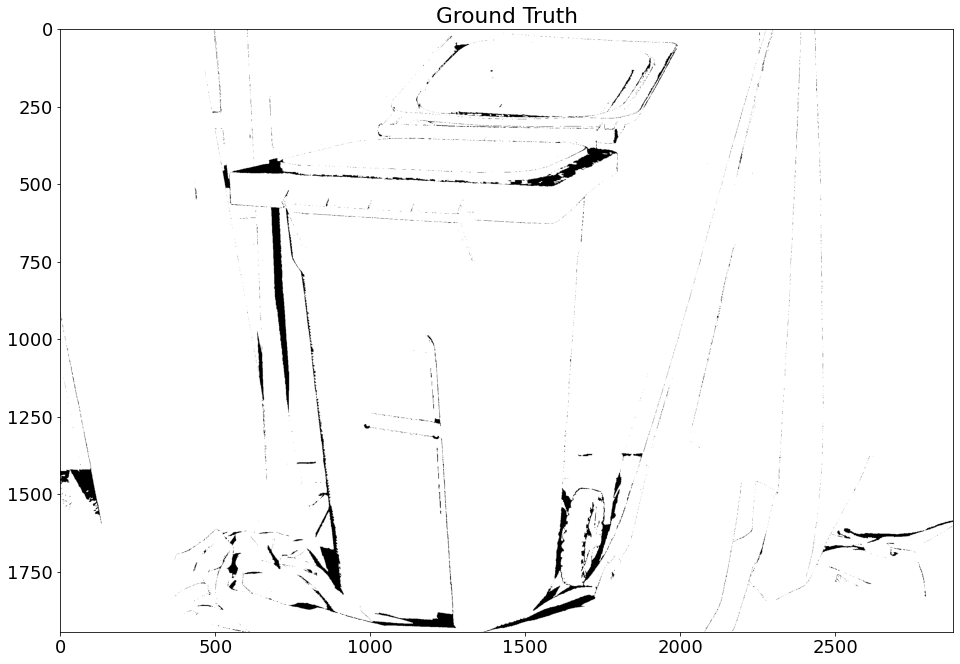

In [2]:
ground_truth = cv.imread("disp0.pfm", 0)
imgL = cv.imread('im2_0.png')
imgR = cv.imread('im2_1.png')
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
plt.title("Original image left")
plt.subplot(122)
plt.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
plt.title("Original image right")
plt.show()
plt.figure(figsize=(16, 12))
plt.imshow(ground_truth, cmap="gray")
plt.title("Ground Truth")
plt.show()

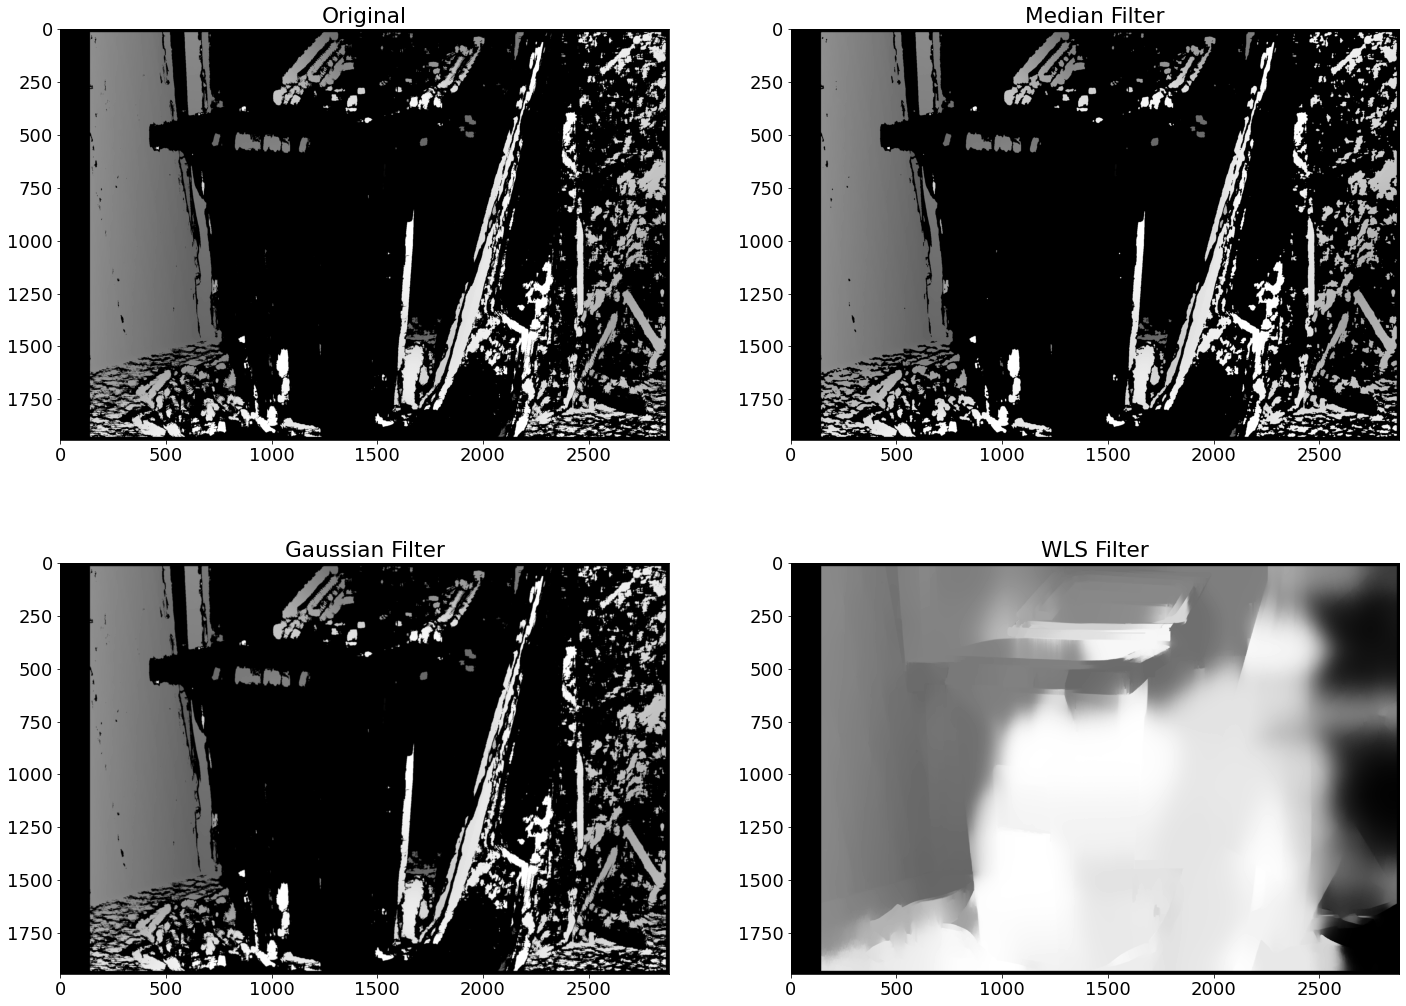

In [3]:
imgL = cv.imread('im2_0.png', 0)
imgR = cv.imread('im2_1.png', 0)

max_disp = 128
wsize = 31

disparity = generatedDisparity(imgL, imgR, max_disp, wsize)
gaussian = generateGaussianFilter(disparity)
median = generateMedianFilter(disparity)
WLS = generateWLS(imgL, imgR, max_disp, wsize)

fig = plt.figure(figsize=(24, 18))
plt.subplot(221)
plt.imshow(disparity, cmap="gray")
plt.title("Original")
plt.subplot(222)
plt.imshow(median, cmap="gray")
plt.title("Median Filter")
plt.subplot(223)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian Filter")
plt.subplot(224)
plt.imshow(WLS, cmap="gray")
plt.title("WLS Filter")
plt.show()

In [4]:
calculateMSE(ground_truth=ground_truth,
             original_disparity=disparity,
             median_filter=median,
             gaussian_filter=gaussian,
             WLS_filter=WLS)

MSE of original_disparity: 5820.665205439815
MSE of median_filter: 5834.656309656493
MSE of gaussian_filter: 5261.325491719536
MSE of WLS_filter: 684.8298945116027


# Image 2

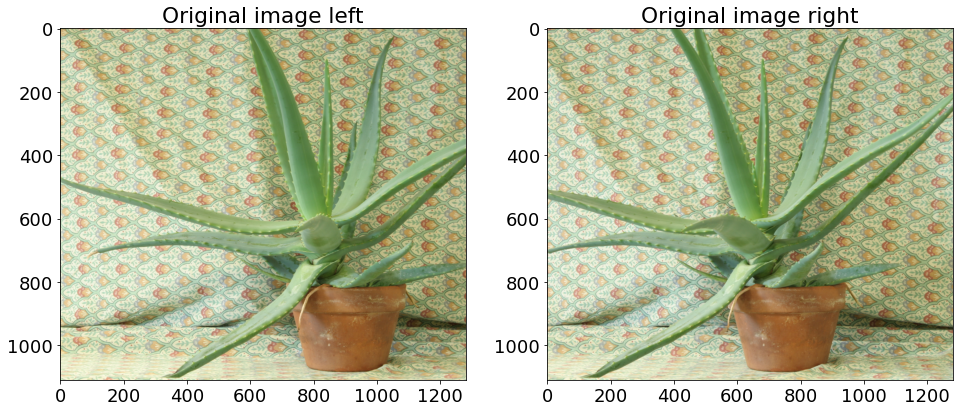

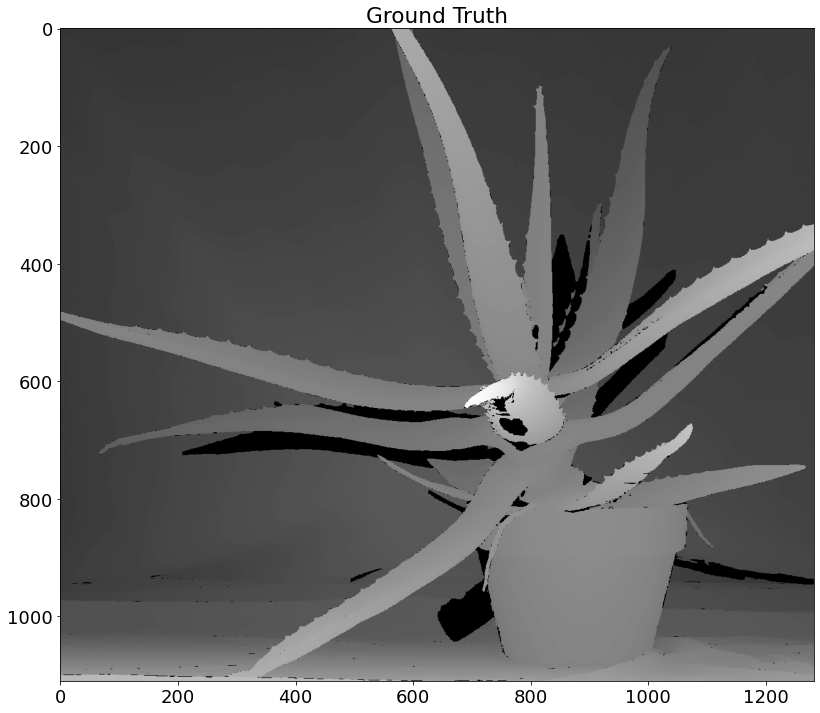

In [5]:
ground_truth = cv.imread("disp4.png", 0)
imgL = cv.imread('im4_0.png')
imgR = cv.imread('im4_1.png')
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
plt.title("Original image left")
plt.subplot(122)
plt.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
plt.title("Original image right")
plt.show()
plt.figure(figsize=(16, 12))
plt.imshow(ground_truth, cmap="gray")
plt.title("Ground Truth")
plt.show()

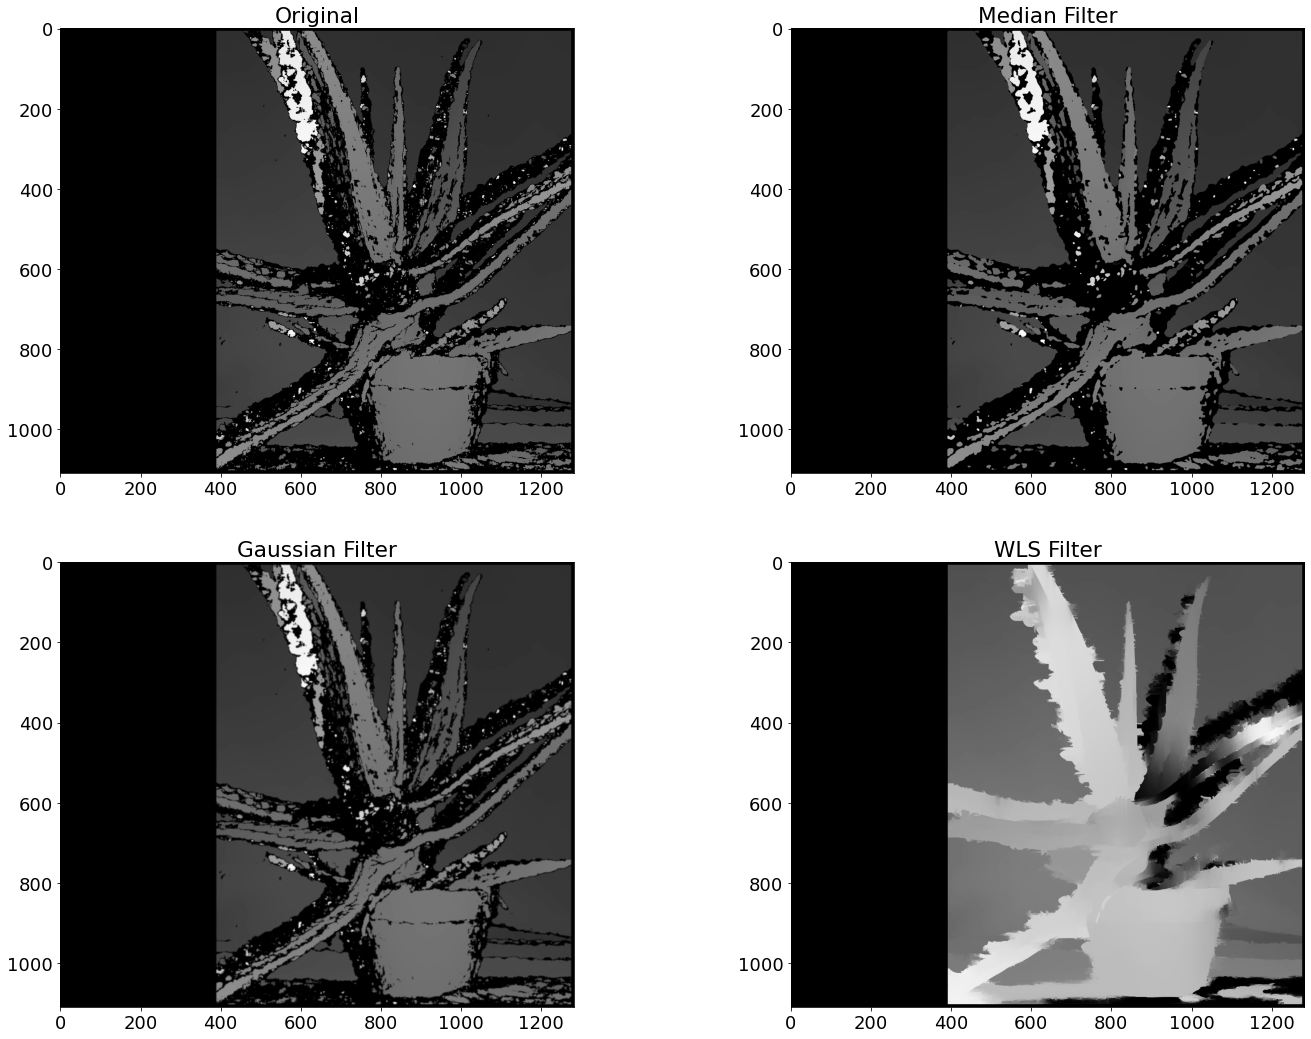

In [6]:
imgL = cv.imread('im4_0.png', 0)
imgR = cv.imread('im4_1.png', 0)

max_disp = 384
wsize = 15

disparity = generatedDisparity(imgL, imgR, max_disp, wsize)
gaussian = generateGaussianFilter(disparity)
median = generateMedianFilter(disparity)
WLS = generateWLS(imgL, imgR, max_disp, wsize)

fig = plt.figure(figsize=(24, 18))
plt.subplot(221)
plt.imshow(disparity, cmap="gray")
plt.title("Original")
plt.subplot(222)
plt.imshow(median, cmap="gray")
plt.title("Median Filter")
plt.subplot(223)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian Filter")
plt.subplot(224)
plt.imshow(WLS, cmap="gray")
plt.title("WLS Filter")
plt.show()

In [7]:
calculateMSE(ground_truth=ground_truth,
             original_disparity=disparity,
             median_filter=median,
             gaussian_filter=gaussian,
             WLS_filter=WLS)

MSE of original_disparity: 4147.119443858835
MSE of median_filter: 4167.283877949712
MSE of gaussian_filter: 3265.612648451884
MSE of WLS_filter: 2189.2075121923795


# Image 3

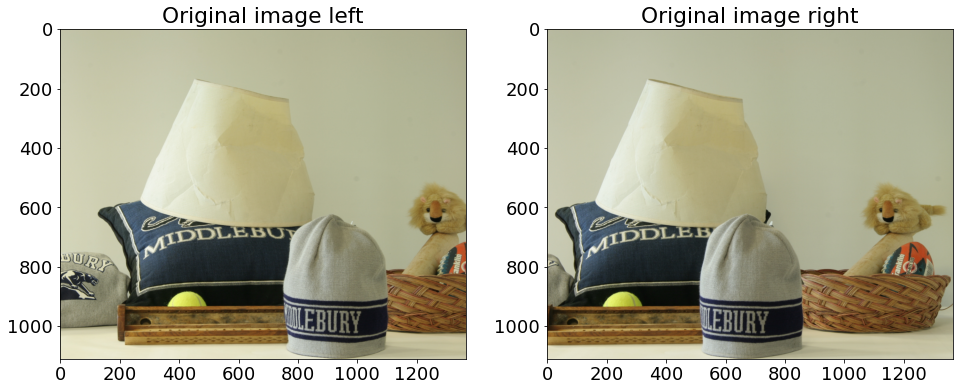

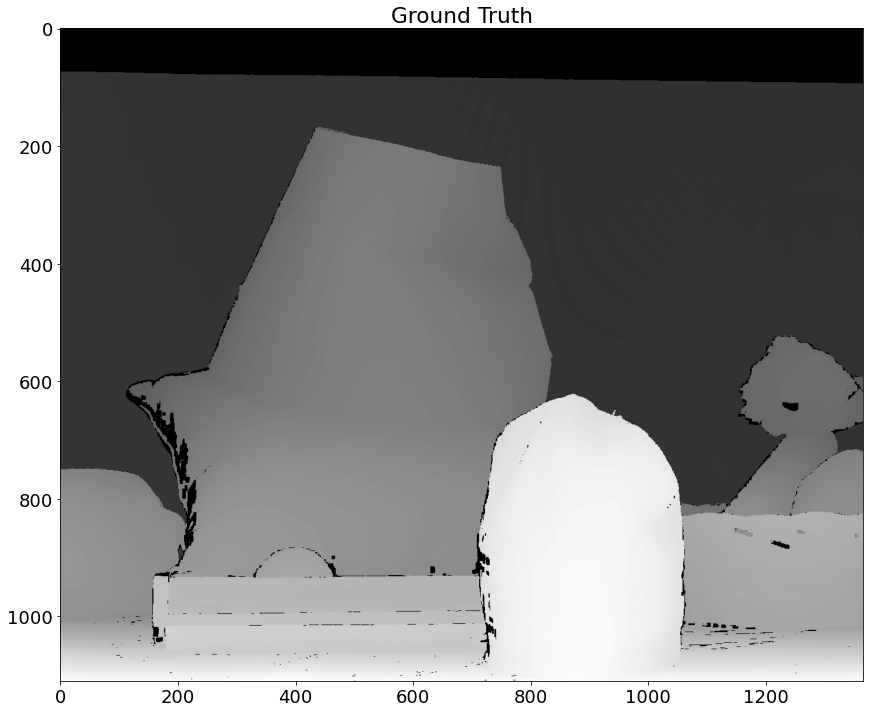

In [8]:
ground_truth = cv.imread("disp5.png", 0)
imgL = cv.imread('im6_0.png')
imgR = cv.imread('im6_1.png')
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
plt.title("Original image left")
plt.subplot(122)
plt.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
plt.title("Original image right")
plt.show()
plt.figure(figsize=(16, 12))
plt.imshow(ground_truth, cmap="gray")
plt.title("Ground Truth")
plt.show()

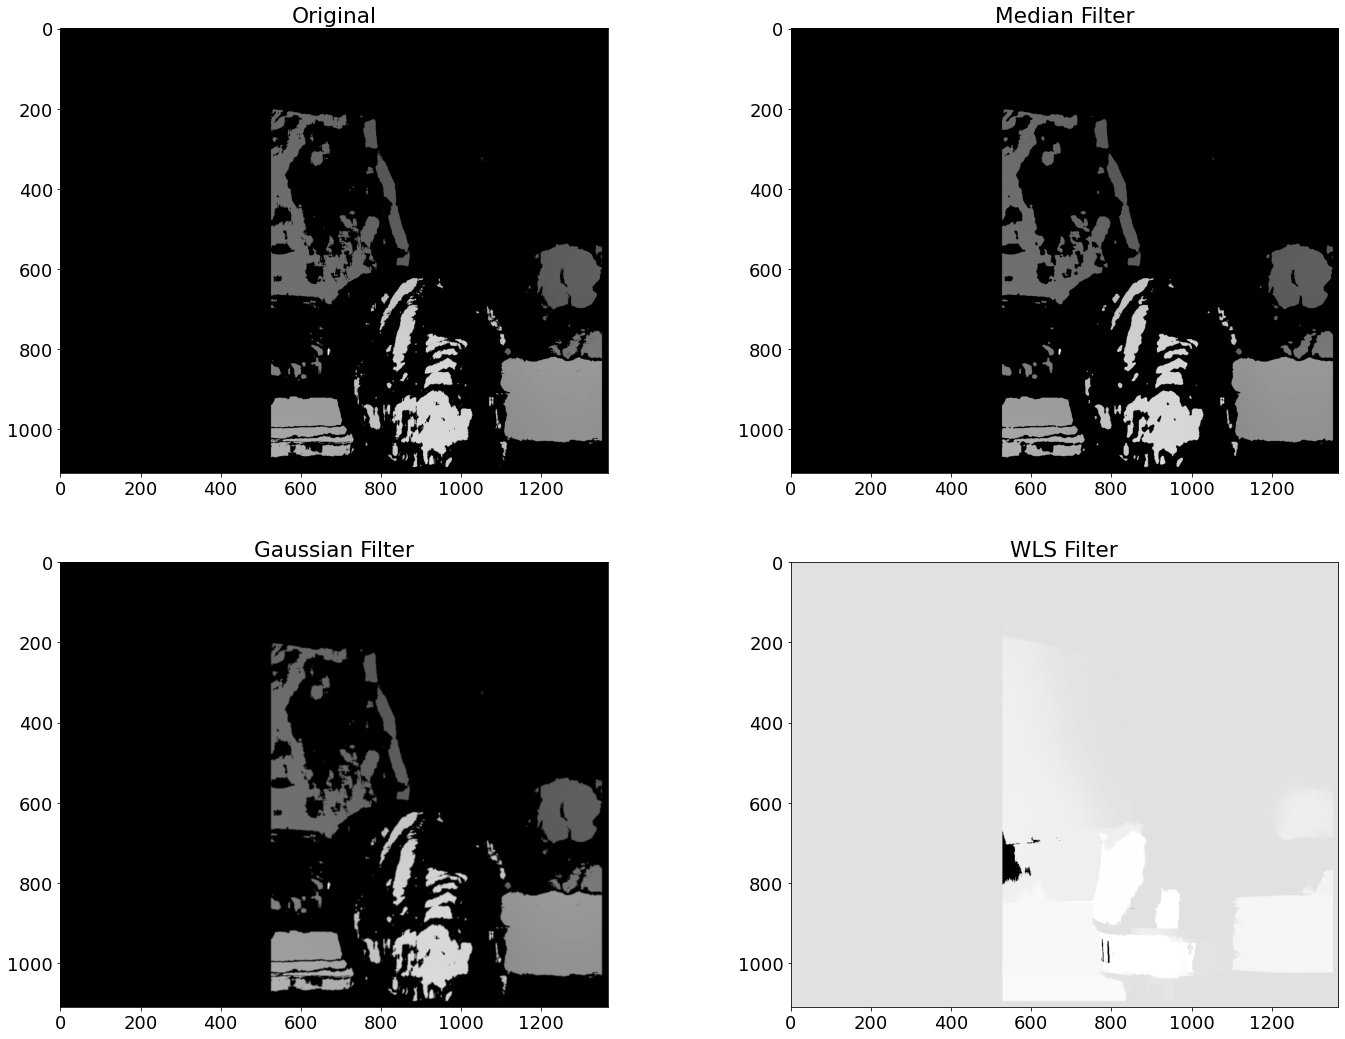

In [39]:
imgL = cv.imread('im6_0.png', 0)
imgR = cv.imread('im6_1.png', 0)

max_disp = 512
wsize = 31

disparity = generatedDisparity(imgL, imgR, max_disp, wsize)
gaussian = generateGaussianFilter(disparity)
median = generateMedianFilter(disparity)
WLS = generateWLS(imgL, imgR, max_disp, wsize)

fig = plt.figure(figsize=(24, 18))
plt.subplot(221)
plt.imshow(disparity, cmap="gray")
plt.title("Original")
plt.subplot(222)
plt.imshow(median, cmap="gray")
plt.title("Median Filter")
plt.subplot(223)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian Filter")
plt.subplot(224)
plt.imshow(WLS, cmap="gray")
plt.title("WLS Filter")
plt.show()

In [40]:
calculateMSE(ground_truth=ground_truth,
             original_disparity=disparity,
             median_filter=median,
             gaussian_filter=gaussian,
             WLS_filter=WLS)

MSE of original_disparity: 3769.1992059409336
MSE of median_filter: 3765.9805666574334
MSE of gaussian_filter: 3848.7544227243347
MSE of WLS_filter: 3597.8995132760874
